### Preparing the dataset

In [1]:
#Imports
import pandas as pd
import numpy as np
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import warnings
import seaborn as sns
warnings.filterwarnings('ignore')

In [2]:
#Reading the csv file
phishing = pd.read_csv("phishing data.csv").replace({"phishing":1, "legitimate":0}, regex=True)

In [3]:
#Display of the data
phishing.head()

,url,length_url,length_hostname,ip,nb_dots,nb_hyphens,nb_at,nb_qm,nb_and,nb_or,...,domain_in_title,domain_with_copyright,whois_registered_domain,domain_registration_length,domain_age,web_traffic,dns_record,google_index,page_rank,status
0,http://www.crestonwood.com/router.php,37,19,0,3,0,0,0,0,0,...,0,1,0,45,-1,0,1,1,4,0
1,http://shadetreetechnology.com/V4/validation/a...,77,23,1,1,0,0,0,0,0,...,1,0,0,77,5767,0,0,1,2,1
2,https://support-appleld.com.secureupdate.duila...,126,50,1,4,1,0,1,2,0,...,1,0,0,14,4004,5828815,0,1,0,1
3,http://rgipt.ac.in,18,11,0,2,0,0,0,0,0,...,1,0,0,62,-1,107721,0,0,3,0
4,http://www.iracing.com/tracks/gateway-motorspo...,55,15,0,2,2,0,0,0,0,...,0,1,0,224,8175,8725,0,0,6,0


### Exploration of features

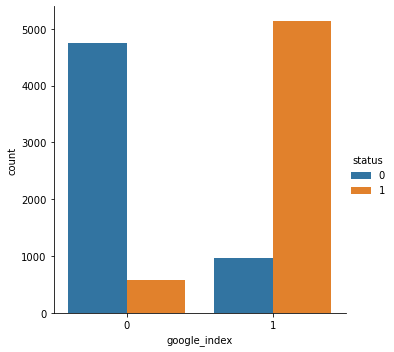

In [4]:
sns.catplot("google_index", hue="status", data=phishing, kind="count")

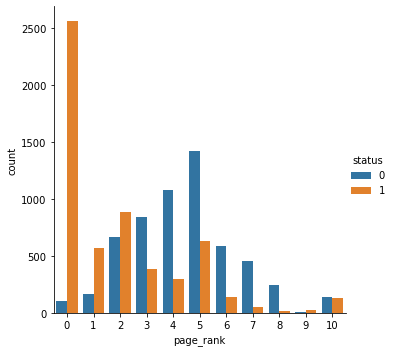

In [5]:
sns.catplot("page_rank", hue="status", data=phishing, kind="count")

### Splitting the data into a training set and a test set

In [6]:
#Splitting the data into the data, X, and the target, y
X = phishing.drop('status', axis=1).drop("url", axis=1)
y = phishing['status']

print("x has shape", X.shape)
print("y has shape", y.shape)

x has shape (11430, 87)
y has shape (11430,)


In [7]:
#Splitting the data into a train and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=0)

print("X_train has shape", X_train.shape)
print("X_test has shape", X_test.shape)
print("y_train has shape", y_train.shape)
print("y_test has shape", y_test.shape)

X_train has shape (8572, 87)
X_test has shape (2858, 87)
y_train has shape (8572,)
y_test has shape (2858,)


### Dummy classifier

In [8]:
from sklearn.dummy import DummyClassifier
dummy = DummyClassifier(strategy = "most_frequent")
dummy.fit(X_train, y_train)
dummy.predict(X_test)
dummy.score(X_test, y_test)

0.5

### Scaling the data

In [9]:
#Code for scaling
phishingscaled = StandardScaler().fit(X_train)
X_train = phishingscaled.fit_transform(X_train)
X_test = phishingscaled.fit_transform(X_test)

### Linear Support Vector Classifier

In [64]:
#Linear SVC
from sklearn.svm import LinearSVC

linsvc = LinearSVC(random_state = 0).fit(X_train, y_train)

print("Accuracy on training set: {:.4f}".format(linsvc.score(X_train, y_train)))
print("Accuracy on test set: {:.4f}".format(linsvc.score(X_test, y_test)))

Accuracy on training set: 0.9498
Accuracy on test set: 0.9391


**Parameter:** C

In [11]:
#test of c values
linsvc_train_scores = []
linsvc_test_scores = []

print("Train    Test    C-value")
for v in (0.0001, 0.001, 0.001, 0.1, 1, 2, 3, 10):
    linsvctries = LinearSVC(random_state = 0, C = v).fit(X_train, y_train)
            
    linsvc_train = linsvctries.score(X_train, y_train)
    linsvc_train_scores.append(linsvc_train)
    
    linsvc_test = linsvctries.score(X_test, y_test)   
    linsvc_test_scores.append(linsvc_test)

    print("{:.4f}   {:.4f}  {}   ".format(linsvc_train, linsvc_test, v))

Train    Test    C-value
0.9355   0.9283  0.0001   
0.9454   0.9374  0.001   
0.9454   0.9374  0.001   
0.9501   0.9384  0.1   
0.9498   0.9391  1   
0.9490   0.9402  2   
0.9489   0.9398  3   
0.9442   0.9314  10   


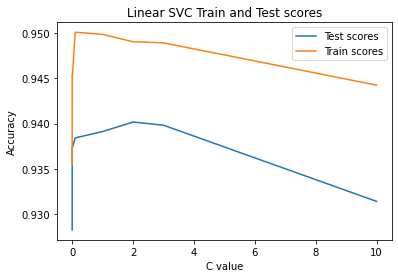

In [12]:
x = (0.0001, 0.001, 0.01, 0.1, 1, 2, 3, 10)

plt.plot(x, linsvc_test_scores, label="Test scores")
plt.plot(x, linsvc_train_scores, label="Train scores")
plt.title('Linear SVC Train and Test scores')
plt.ylabel("Accuracy")
plt.xlabel("C value")
plt.legend(loc="best")
plt.show()

In [43]:
#coefficient function
def coeffReport(linearModel):

    coefs=linearModel.coef_[0]

    sorted_coefs = sorted((zip(phishing, coefs)),
                key = lambda e:e[1], reverse=True )
    print("Highest Coefficients")
    for coefficient in sorted_coefs[:5]:
        print(coefficient)

    print("\nLowest Coefficients")
    for coefficient in sorted_coefs[-5:]:
        print(coefficient)
    
    coefsAbs = list(map(abs,coefs))
    sorted_coefs = sorted ((zip(phishing, coefsAbs)),
                key = lambda e:e[1], reverse=True)

    print("\nCoefficients Closest to Zero")
    for coefficient in sorted_coefs[-5:]:
        print(coefficient)

In [42]:
linsvctuned = LinearSVC(random_state = 0, C = 2).fit(X_train, y_train)

coeffReport(linsvctuned)

Highest Coefficients
('shortest_word_path', 1.7150173983731885)
('nb_comma', 0.5602473156513835)
('dns_record', 0.48868792382370585)
('avg_word_path', 0.4815507116914789)
('shortest_words_raw', 0.29175463854649863)

Lowest Coefficients
('longest_word_host', -0.2944224645189066)
('nb_space', -0.3103235455083784)
('longest_word_path', -0.315190271374102)
('google_index', -0.48674855142502654)
('avg_words_raw', -0.5466553672658023)

Coefficients Closest to Zero
('ratio_extHyperlinks', 0.0)
('nb_extCSS', 0.0)
('ratio_extRedirection', 0.0)
('links_in_tags', 0.0)
('ratio_extMedia', 0.0)


### Logistic Regression

In [66]:
#Logistic Regression
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression(random_state=0).fit(X_train, y_train)

print("Accuracy on training set: {:.4f}".format(logreg.score(X_train, y_train)))
print("Accuracy on test set: {:.4f}".format(logreg.score(X_test, y_test)))

Accuracy on training set: 0.9504
Accuracy on test set: 0.9398


**Parameter:** C

In [16]:
#test of c values
logreg_train_scores = []
logreg_test_scores = []

print("Train    Test    C-value")
for c in range(2, 40, 5):
    logregtries = LogisticRegression(random_state = 0, C = c).fit(X_train, y_train)
            
    logreg_train = logregtries.score(X_train, y_train)
    logreg_train_scores.append(logreg_train)
    
    logreg_test = logregtries.score(X_test, y_test)   
    logreg_test_scores.append(logreg_test)

    print("{:.4f}   {:.4f}  {}   ".format(logreg_train, logreg_test, c))

Train    Test    C-value
0.9509   0.9391  2   
0.9509   0.9398  7   
0.9508   0.9402  12   
0.9514   0.9395  17   
0.9511   0.9395  22   
0.9508   0.9398  27   
0.9508   0.9395  32   
0.9511   0.9395  37   


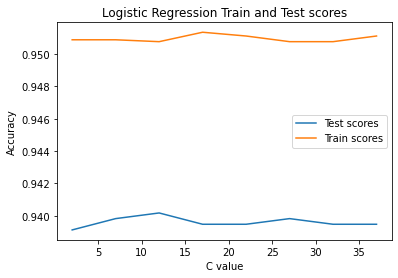

In [17]:
x = range(2, 40, 5)

plt.plot(x, logreg_test_scores, label="Test scores")
plt.plot(x, logreg_train_scores, label="Train scores")
plt.title('Logistic Regression Train and Test scores')
plt.ylabel("Accuracy")
plt.xlabel("C value")
plt.legend(loc="best")
plt.show()

In [18]:
logregtuned = LogisticRegression(random_state = 0, C = c).fit(X_train, y_train)

coeffReport(logregtuned)

Highest Coefficients
('shortest_word_path', 5.889403957135865)
('nb_comma', 1.9599531632404597)
('avg_word_path', 1.6905860580006808)
('dns_record', 1.6004046231689473)
('nb_hyphens', 1.2104665965504438)

Lowest Coefficients
('longest_word_path', -1.08550482161158)
('nb_space', -1.0967327260088473)
('longest_word_host', -1.1267021328584086)
('google_index', -1.6674044361050466)
('avg_words_raw', -1.9669838683327785)

Coefficients Closest to Zero
('ratio_extHyperlinks', 0.0)
('nb_extCSS', 0.0)
('ratio_extRedirection', 0.0)
('links_in_tags', 0.0)
('ratio_extMedia', 0.0)


### Decision Tree Classifier

In [19]:
#Decision Tree Classifier
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(random_state=0).fit(X_train, y_train)

print("Accuracy on training set: {:.4f}".format(dt.score(X_train, y_train)))
print("Accuracy on test set: {:.4f}".format(dt.score(X_test, y_test)))

Accuracy on training set: 1.0000
Accuracy on test set: 0.9227


**Parameter:** max_depth

In [20]:
#test of max depths
dt_train_scores = []
dt_test_scores = []

print("Train    Test    max_depth")
for d in (1, 5, 8, 12, 15, 20):
    dttries = DecisionTreeClassifier(random_state = 0, max_depth = d).fit(X_train, y_train)
            
    dt_train = dttries.score(X_train, y_train)
    dt_train_scores.append(dt_train)
    
    dt_test = dttries.score(X_test, y_test)   
    dt_test_scores.append(dt_test)

    print("{:.4f}   {:.4f}  {}   ".format(dt_train, dt_test, d))

Train    Test    max_depth
0.8654   0.8628  1   
0.9385   0.9223  5   
0.9684   0.9346  8   
0.9871   0.9293  12   
0.9941   0.9300  15   
0.9994   0.9241  20   


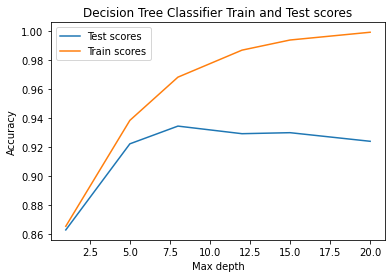

In [21]:
x = (1, 5, 8, 12, 15, 20)

plt.plot(x, dt_test_scores, label="Test scores")
plt.plot(x, dt_train_scores, label="Train scores")
plt.title('Decision Tree Classifier Train and Test scores')
plt.ylabel("Accuracy")
plt.xlabel("Max depth")
plt.legend(loc="best")
plt.show()

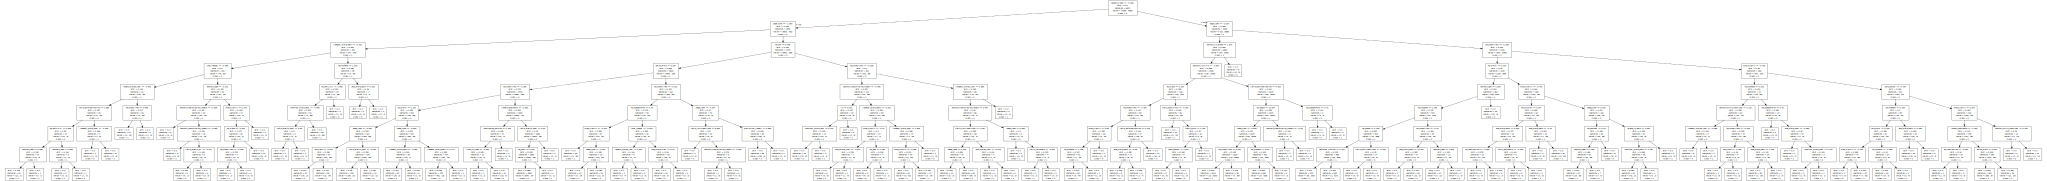

In [22]:
dttuned = DecisionTreeClassifier(random_state=0, max_depth = 8).fit(X_train, y_train)

import graphviz
from sklearn import tree

tree.export_graphviz(dttuned, out_file="tree.dot", class_names=["0", "1"], feature_names = X.columns)

with open("tree.dot") as f:
    dot_graph = f.read()
    display(graphviz.Source(dot_graph))

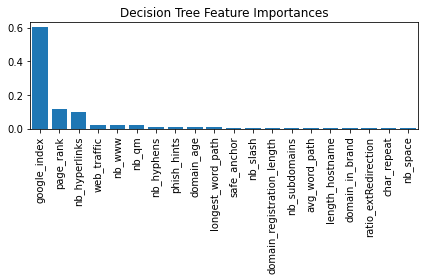

In [23]:
dtimportances = dttuned.feature_importances_
sorted_indices = np.argsort(dtimportances)[::-1]

plt.title('Decision Tree Feature Importances')
plt.bar(range(X_train.shape[1]), dtimportances[sorted_indices])
plt.xticks(range(X_train.shape[1]), X.columns[sorted_indices], rotation=90)
plt.tight_layout()
plt.xlim(-0.5, 19.5)
plt.show()

### Random Forest Classifier

In [24]:
#Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(random_state=0).fit(X_train, y_train)

print("Accuracy on training set: {:.4f}".format(rfc.score(X_train, y_train)))
print("Accuracy on test set: {:.4f}".format(rfc.score(X_test, y_test)))

Accuracy on training set: 1.0000
Accuracy on test set: 0.9612


**Parameters:** n_estimators, max_depth

In [25]:
#test of n-estimators
rfc_train_scores = []
rfc_test_scores = []

print("Train    Test    n_estimators")
for n in range(100, 1001, 100):
    rfctries = RandomForestClassifier(random_state = 0, n_estimators = n).fit(X_train, y_train)
            
    rfc_train = rfctries.score(X_train, y_train)
    rfc_train_scores.append(rfc_train)
    
    rfc_test = rfctries.score(X_test, y_test)   
    rfc_test_scores.append(rfc_test)

    print("{:.4f}   {:.4f}  {}   ".format(rfc_train, rfc_test, n))

Train    Test    n_estimators
1.0000   0.9612  100   
1.0000   0.9619  200   
1.0000   0.9612  300   
1.0000   0.9622  400   
1.0000   0.9622  500   
1.0000   0.9615  600   
1.0000   0.9612  700   
1.0000   0.9612  800   
1.0000   0.9615  900   
1.0000   0.9615  1000   


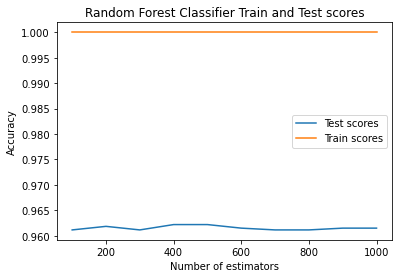

In [26]:
#plot train and test scores
#x axis - a list of the values for number of estimators
x = range(100, 1001, 100)
#y axis - list of train scores
plt.plot(x, rfc_test_scores, label="Test scores")
plt.plot(x, rfc_train_scores, label="Train scores")
plt.title('Random Forest Classifier Train and Test scores')
plt.ylabel("Accuracy")
plt.xlabel("Number of estimators")
plt.legend(loc="best")
#show the plots
plt.show()

In [27]:
#test of max_depth
rfc2_train_scores = []
rfc2_test_scores = []

print("Train    Test    max_depth")
for n in range(2, 21, 2):
    rfctries2 = RandomForestClassifier(random_state = 0, max_depth = n).fit(X_train, y_train)
            
    rfc2_train = rfctries2.score(X_train, y_train)
    rfc2_train_scores.append(rfc2_train)
    
    rfc2_test = rfctries2.score(X_test, y_test)   
    rfc2_test_scores.append(rfc2_test)

    print("{:.4f}   {:.4f}  {}   ".format(rfc2_train, rfc2_test, n))

Train    Test    max_depth
0.9276   0.9167  2   
0.9416   0.9307  4   
0.9565   0.9447  6   
0.9703   0.9500  8   
0.9817   0.9531  10   
0.9908   0.9563  12   
0.9955   0.9549  14   
0.9987   0.9584  16   
1.0000   0.9591  18   
1.0000   0.9591  20   


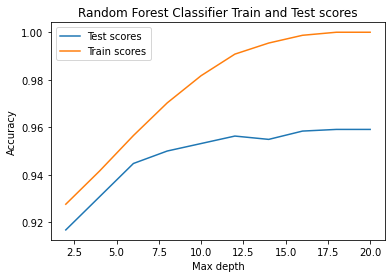

In [28]:
#plot train and test scores
#x axis - a list of the values for number of estimators
x = range(2, 21, 2)
#y axis - list of train scores
plt.plot(x, rfc2_test_scores, label="Test scores")
plt.plot(x, rfc2_train_scores, label="Train scores")
plt.title('Random Forest Classifier Train and Test scores')
plt.ylabel("Accuracy")
plt.xlabel("Max depth")
plt.legend(loc="best")
#show the plots
plt.show()

In [29]:
rfctuned = RandomForestClassifier(random_state=0, max_depth=12).fit(X_train, y_train)

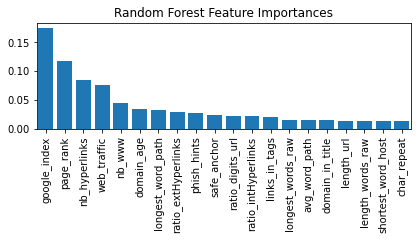

In [30]:
rfctunedimportances = rfctuned.feature_importances_
sorted_indices = np.argsort(rfctunedimportances)[::-1]

plt.title('Random Forest Feature Importances')
plt.bar(range(X_train.shape[1]), rfctunedimportances[sorted_indices])
plt.xticks(range(X_train.shape[1]), X.columns[sorted_indices], rotation=90)
plt.tight_layout()
plt.xlim(-0.5, 19.5)
plt.show()

### MLP

In [31]:
#MLP
from sklearn.neural_network import MLPClassifier

mlp = MLPClassifier(random_state = 0).fit(X_train, y_train)

print("Accuracy on training set: {:.4f}".format(mlp.score(X_train, y_train)))
print("Accuracy on test set: {:.4f}".format(mlp.score(X_test, y_test)))

Accuracy on training set: 1.0000
Accuracy on test set: 0.9535


**Parameter:** hidden_layer_sizes

In [32]:
#test of hidden layers
mlp_train_scores = []
mlp_test_scores = []

print("Train      Test       Hidden layer size")
for n in range(10, 711, 100):
    mlptries = MLPClassifier(random_state = 0, hidden_layer_sizes = n).fit(X_train, y_train)
       
    mlp_train = mlptries.score(X_train,y_train)
    mlp_train_scores.append(mlp_train)
    
    mlp_test = mlptries.score(X_test,y_test)
    mlp_test_scores.append(mlp_test)
       
    print("{:.4f}     {:.4f}     {}  ".format(mlp_train, mlp_test, n))

Train      Test       Hidden layer size
0.9815     0.9503     10  
1.0000     0.9531     110  
1.0000     0.9605     210  
1.0000     0.9545     310  
0.9995     0.9549     410  
0.9999     0.9521     510  
0.9997     0.9517     610  
1.0000     0.9570     710  


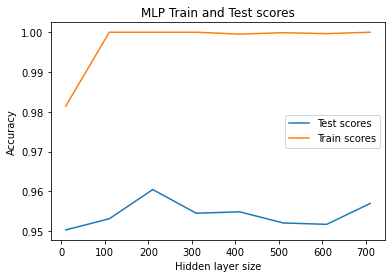

In [33]:
x = range(10, 711, 100)

plt.plot(x, mlp_test_scores, label="Test scores")
plt.plot(x, mlp_train_scores, label="Train scores")
plt.title('MLP Train and Test scores')
plt.ylabel("Accuracy")
plt.xlabel("Hidden layer size")
plt.legend(loc="best")
plt.show()

In [34]:
#test2 of hidden layers
mlp2_train_scores = []
mlp2_test_scores = []

print("Train      Test       Hidden layer size")
for n in range(1, 50, 3):
    mlptries2 = MLPClassifier(random_state = 0, hidden_layer_sizes = n).fit(X_train, y_train)
       
    mlp2_train = mlptries2.score(X_train,y_train)
    mlp2_train_scores.append(mlp2_train)
    
    mlp2_test = mlptries2.score(X_test,y_test)
    mlp2_test_scores.append(mlp2_test)
       
    print("{:.4f}     {:.4f}     {}  ".format(mlp2_train, mlp2_test, n))

Train      Test       Hidden layer size
0.9491     0.9381     1  
0.9669     0.9475     4  
0.9782     0.9538     7  
0.9815     0.9503     10  
0.9846     0.9514     13  
0.9873     0.9447     16  
0.9934     0.9493     19  
0.9948     0.9503     22  
0.9971     0.9531     25  
0.9972     0.9479     28  
0.9985     0.9514     31  
0.9992     0.9500     34  
0.9993     0.9503     37  
0.9992     0.9507     40  
0.9993     0.9496     43  
0.9998     0.9524     46  
0.9999     0.9524     49  


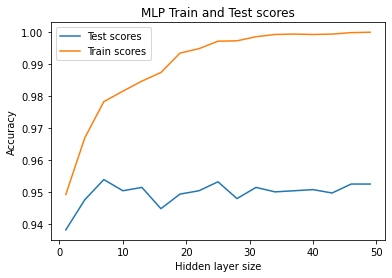

In [35]:
x = range(1, 50, 3)

plt.plot(x, mlp2_test_scores, label="Test scores")
plt.plot(x, mlp2_train_scores, label="Train scores")
plt.title('MLP Train and Test scores')
plt.ylabel("Accuracy")
plt.xlabel("Hidden layer size")
plt.legend(loc="best")
plt.show()